# Test models

## General setup and imports

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

root_path = os.path.abspath(os.path.join('..'))
if root_path not in sys.path:
    sys.path.append(root_path)

In [2]:
import classification.data_loading as dl
import classification.lstm_model as lstm_model
import classification.knn as knn_model
import classification.naive_bayes as nb_model
from e_nose.measurements import DataType

## Load data

In [3]:
current_path = os.getcwd()
dir_train = '../data_train' # specify this
dir_val = '../data_val' # specify this
measurements_in_train, measurements_in_val, num_correct_channels = dl.get_measurements_train_test_from_dir(os.path.join(current_path, dir_train), os.path.join(current_path, dir_val))

Reading file /Users/max/Code/Roboy/roboy_smells_2/roboy_smells/notebooks/../data_train/data_raisin_acetone_orange_juice_pinot_noir_isopropanol_wodka_20_loops_for_2.0_min_referenceTime_2.0_min_2020-3-8_15_19.csv
using sensor 5 specification
Read 1 files
Reading file /Users/max/Code/Roboy/roboy_smells_2/roboy_smells/notebooks/../data_val/data_raisin_acetone_orange_juice_pinot_noir_isopropanol_wodka_20_loops_for_2.0_min_referenceTime_2.0_min_2020-3-8_15_19.csv
using sensor 5 specification
Read 1 files
File /Users/max/Code/Roboy/roboy_smells_2/roboy_smells/notebooks/../data_train/data_raisin_acetone_orange_juice_pinot_noir_isopropanol_wodka_20_loops_for_2.0_min_referenceTime_2.0_min_2020-3-8_15_19.csv:
Found 2 failing channels:
[22 31]
File /Users/max/Code/Roboy/roboy_smells_2/roboy_smells/notebooks/../data_val/data_raisin_acetone_orange_juice_pinot_noir_isopropanol_wodka_20_loops_for_2.0_min_referenceTime_2.0_min_2020-3-8_15_19.csv:
Found 2 failing channels:
[22 31]
----- TOTAL -----
Foun

## Model configurations

In [4]:
input_dim = num_correct_channels
sequence_length = 45

## Define models

In [5]:
# KNN
knn = knn_model.KNN(input_dim=input_dim, data_dir=dir_train, sequence_length=sequence_length, data_type=DataType.HIGH_PASS)

Reading file ../data_train/data_raisin_acetone_orange_juice_pinot_noir_isopropanol_wodka_20_loops_for_2.0_min_referenceTime_2.0_min_2020-3-8_15_19.csv
using sensor 5 specification
Read 1 files
Reading file ../data_train/data_raisin_acetone_orange_juice_pinot_noir_isopropanol_wodka_20_loops_for_2.0_min_referenceTime_2.0_min_2020-3-8_15_19.csv
using sensor 5 specification
Read 1 files
File ../data_train/data_raisin_acetone_orange_juice_pinot_noir_isopropanol_wodka_20_loops_for_2.0_min_referenceTime_2.0_min_2020-3-8_15_19.csv:
Found 2 failing channels:
[22 31]
----- TOTAL -----
Found 2 failing channels:
[22 31]
(95, 62) (95, 1)


In [6]:
# Naive Bayes
gnb = nb_model.GNB(input_dim=input_dim, data_dir=dir_train, sequence_length=sequence_length, data_type=DataType.HIGH_PASS)

Reading file ../data_train/data_raisin_acetone_orange_juice_pinot_noir_isopropanol_wodka_20_loops_for_2.0_min_referenceTime_2.0_min_2020-3-8_15_19.csv
using sensor 5 specification
Read 1 files
Reading file ../data_train/data_raisin_acetone_orange_juice_pinot_noir_isopropanol_wodka_20_loops_for_2.0_min_referenceTime_2.0_min_2020-3-8_15_19.csv
using sensor 5 specification
Read 1 files
File ../data_train/data_raisin_acetone_orange_juice_pinot_noir_isopropanol_wodka_20_loops_for_2.0_min_referenceTime_2.0_min_2020-3-8_15_19.csv:
Found 2 failing channels:
[22 31]
----- TOTAL -----
Found 2 failing channels:
[22 31]


In [7]:
# SmelLSTM
input_shape = (1, sequence_length, input_dim)
smellstm = lstm_model.SmelLSTM(input_shape=input_shape, return_sequences=True, simple_model=True, stateful=True,
                 dim_hidden=12, data_type=DataType.HIGH_PASS, LSTM=True)
model_name = 'RecurrentModelTrainable_4c22e426_6_batch_size=64,data_preprocessing=high_pass,dim_hidden=12,lr=0.031239,return_sequences=True,use__2020-03-30_23-30-574gm3qftn'
checkpoint = 240
model_path = os.path.join(current_path, '../classification/models/')
smellstm.load_weights(model_name, checkpoint, path=model_path)

## Iterate over data:


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



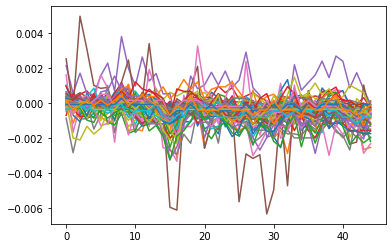

GROUND TRUTH:  raisin
KNN:  raisin
GNB:  raisin
SMELLSTM:  raisin
 


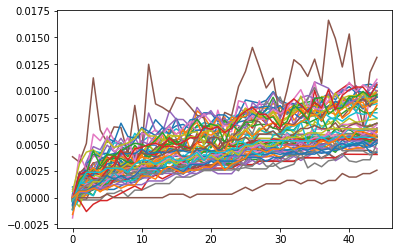

GROUND TRUTH:  pinot_noir
KNN:  pinot_noir
GNB:  pinot_noir
SMELLSTM:  pinot_noir
 


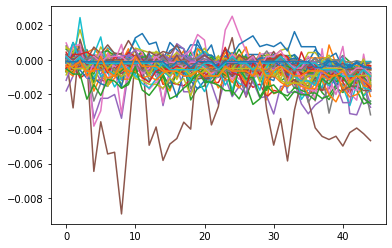

GROUND TRUTH:  raisin
KNN:  raisin
GNB:  raisin
SMELLSTM:  raisin
 


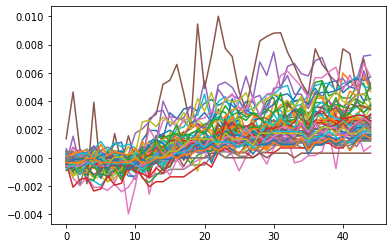

GROUND TRUTH:  orange_juice
KNN:  orange_juice
GNB:  orange_juice
SMELLSTM:  pinot_noir
 


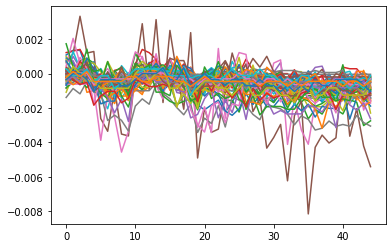

GROUND TRUTH:  raisin
KNN:  raisin
GNB:  raisin
SMELLSTM:  raisin
 


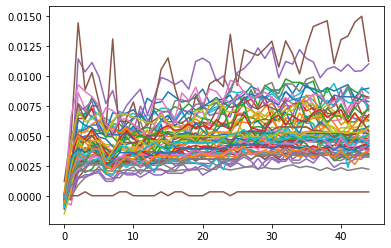

GROUND TRUTH:  isopropanol
KNN:  isopropanol
GNB:  isopropanol
SMELLSTM:  isopropanol
  


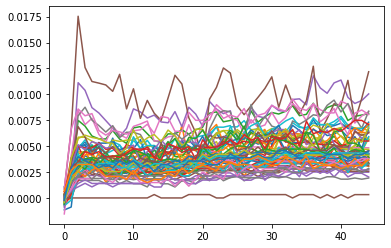

GROUND TRUTH:  isopropanol
KNN:  isopropanol
GNB:  isopropanol
SMELLSTM:  isopropanol


KeyboardInterrupt: 

In [10]:
plotting = True

for m in measurements_in_val:
    gt_label = m.label
    data = m.get_data_as(DataType.HIGH_PASS)[:sequence_length]
    
    prediction_knn = knn.predict_from_batch(data)
    prediction_gnb = gnb.predict_from_batch(data)
    prediction_lstm = smellstm.predict_from_batch(data)
    
    if plotting:
        plt.plot(data)
        plt.show()
        
    
    print("GROUND TRUTH: ", gt_label)
    print("KNN: ", prediction_knn)
    print("GNB: ", prediction_knn)
    print("SMELLSTM: ", prediction_lstm)
    input(' ')